In [607]:
#important library we need
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

- load the data:

In [608]:
bank = pd.read_csv(r"C:\Users\youssef\Desktop\intership_1\bank+marketing\bank\bank-full.csv",sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


- this shows us the column name and number of non null values in the columns and the type of each column:


In [609]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- check for the null values in the columns

In [610]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

- check the duplicated values in the columns:

In [611]:
bank.duplicated().sum()

0

In [612]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


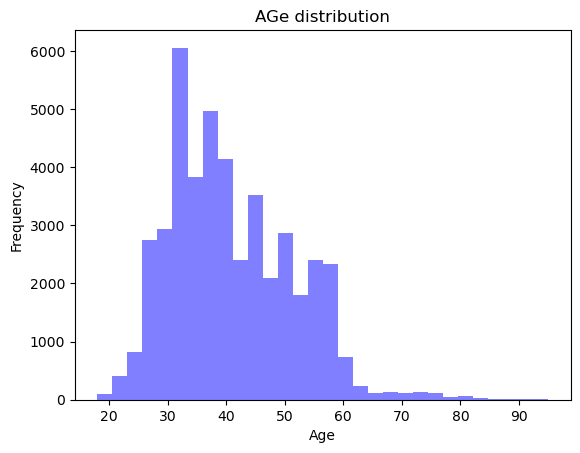

In [613]:
# Create a histogram
plt.hist(bank.age, bins=30, color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('AGe distribution')
plt.show()


- at the above figure we can show the range of the ages in the bank info are between the 20 to 60

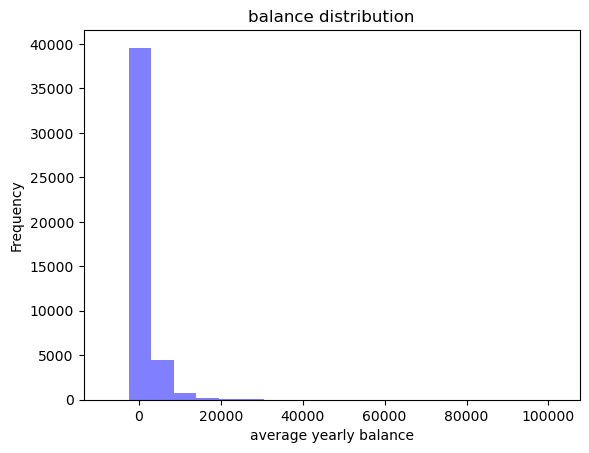

In [614]:
# Create a histogram
plt.hist(bank.balance, bins=20, color='blue', alpha=0.5)
plt.xlabel('average yearly balance')
plt.ylabel('Frequency')
plt.title('balance distribution')
plt.show()


- we can see the all average balanced years not exceed 20000 
- a most of it are equal 0

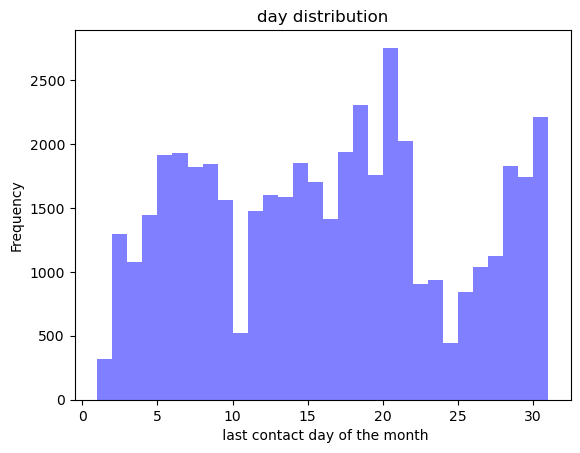

In [615]:
# Create a histogram
plt.hist(bank.day, bins=30, color='blue', alpha=0.5)
plt.xlabel(' last contact day of the month')
plt.ylabel('Frequency')
plt.title('day distribution')
plt.show()


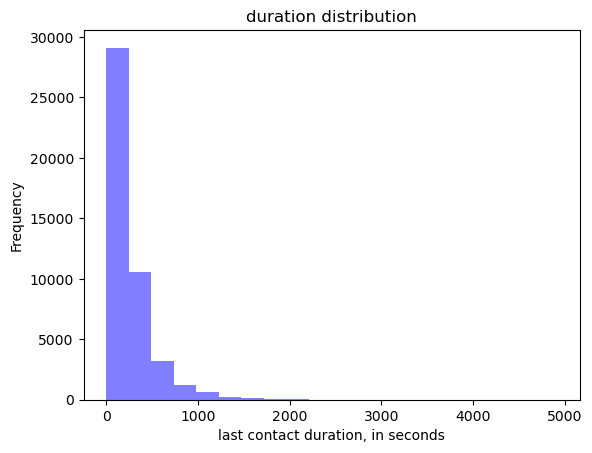

In [616]:
# Create a histogram
plt.hist(bank.duration, bins=20, color='blue', alpha=0.5)
plt.xlabel('last contact duration, in seconds')
plt.ylabel('Frequency')
plt.title('duration distribution')
plt.show()


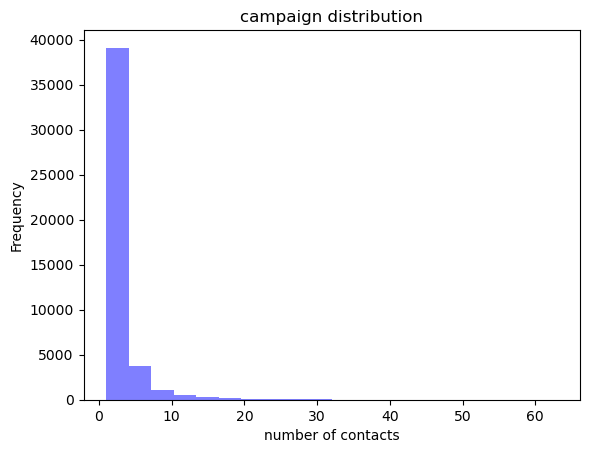

In [617]:
# Create a histogram
plt.hist(bank.campaign, bins=20, color='blue', alpha=0.5)
plt.xlabel('number of contacts')
plt.ylabel('Frequency')
plt.title('campaign distribution')
plt.show()


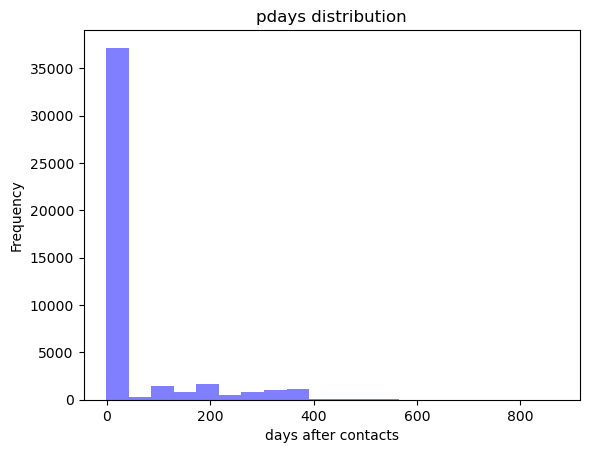

In [618]:
# Create a histogram
plt.hist(bank.pdays, bins=20, color='blue', alpha=0.5)
plt.xlabel('days after contacts')
plt.ylabel('Frequency')
plt.title('pdays distribution')
plt.show()


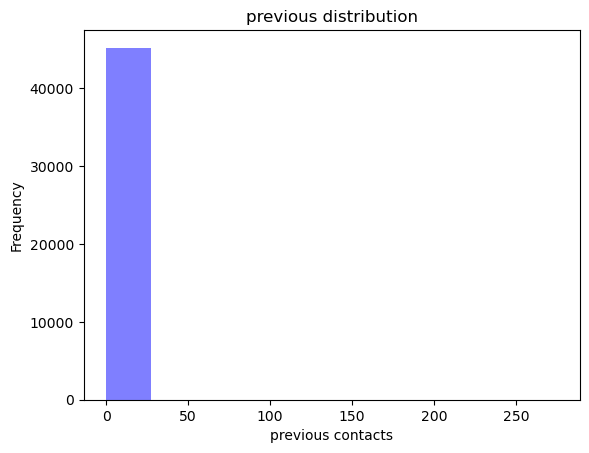

In [619]:
# Create a histogram
plt.hist(bank.previous, bins=10, color='blue', alpha=0.5)
plt.xlabel('previous contacts')
plt.ylabel('Frequency')
plt.title('previous distribution')
plt.show()


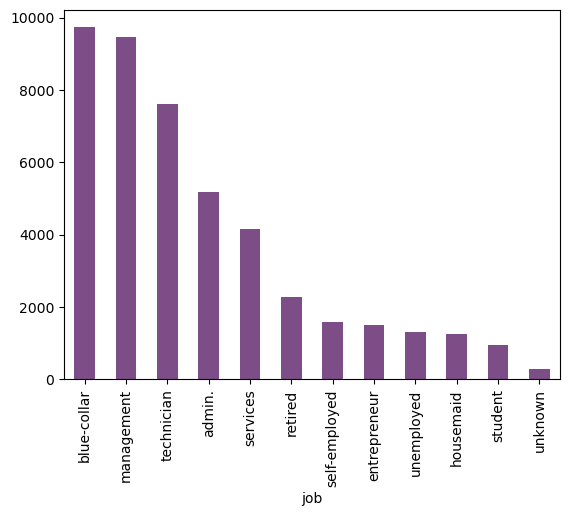

In [620]:
ax = bank['job'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

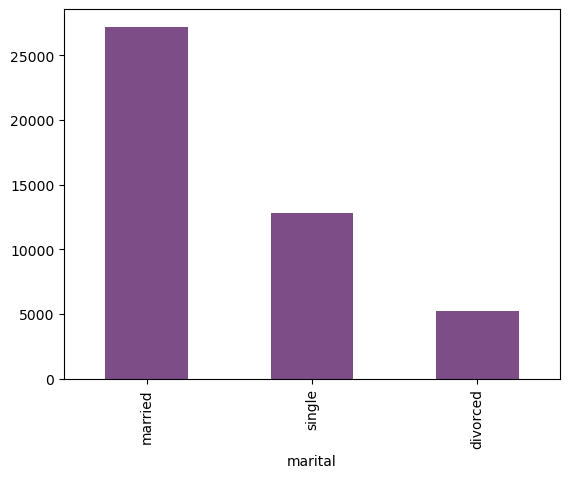

In [621]:
ax = bank['marital'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

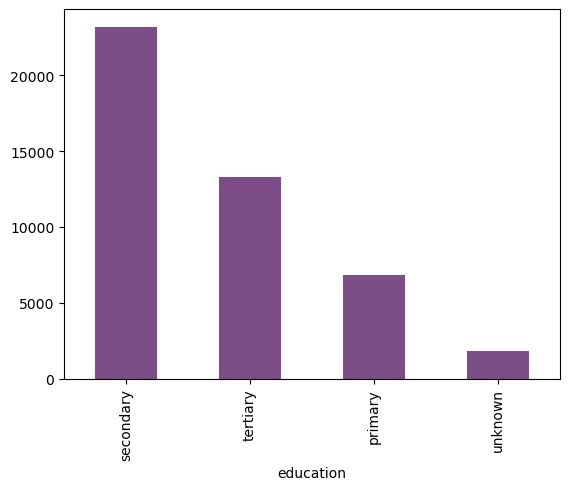

In [622]:
ax = bank['education'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

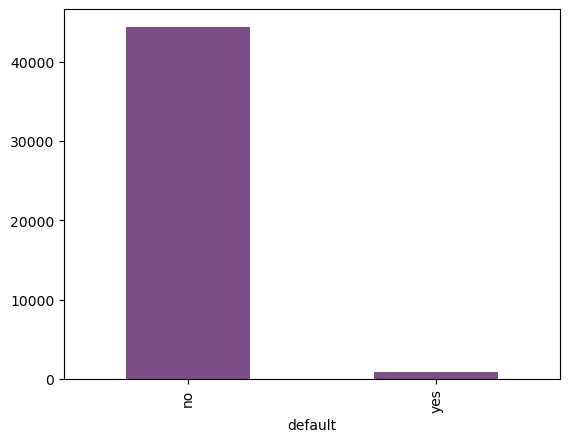

In [623]:
ax = bank['default'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

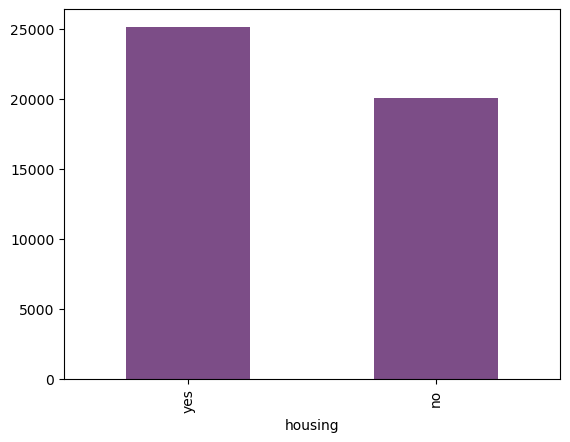

In [624]:
ax = bank['housing'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

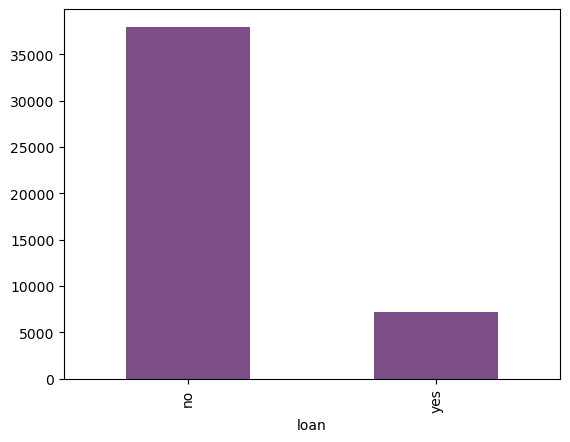

In [625]:
ax = bank['loan'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

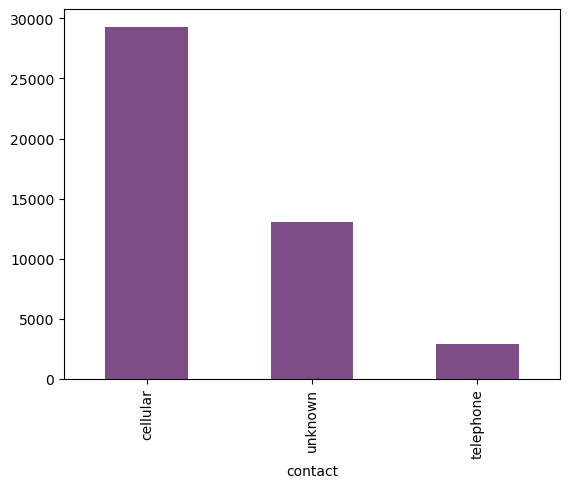

In [626]:
ax = bank['contact'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

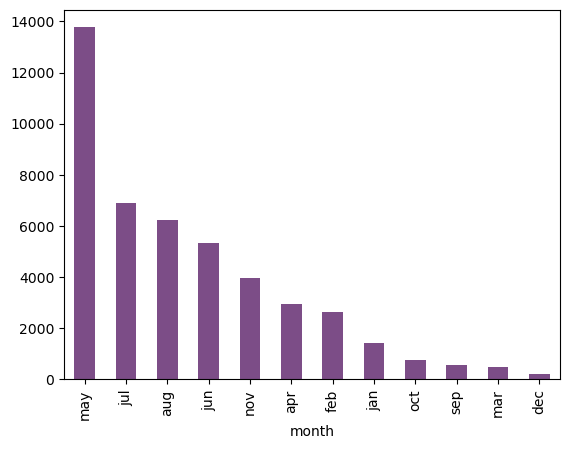

In [627]:
ax = bank['month'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

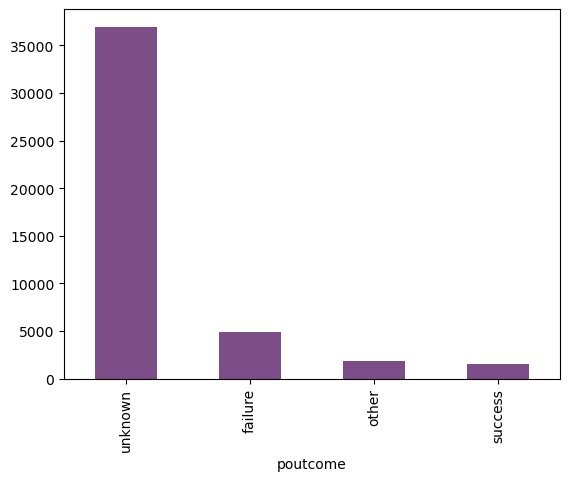

In [628]:
ax = bank['poutcome'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

- from the above figures i will drop the useless columns for the prediction 

In [629]:
#drop th useless columns :
bank.drop(columns=['poutcome','previous','pdays','default'],inplace=True)
bank.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,no


- prepare the object important columns to prediction :

In [630]:
bank = pd.get_dummies(bank, columns=['housing','loan','job','marital','contact','month','education'])

- prepare the column target :

In [631]:
targe=bank['y']
targe.replace({'yes':1,'no':0},inplace=True)
bank.drop('y',axis=1,inplace=True)


- completed of preparing:

In [632]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   housing_no           45211 non-null  bool 
 6   housing_yes          45211 non-null  bool 
 7   loan_no              45211 non-null  bool 
 8   loan_yes             45211 non-null  bool 
 9   job_admin.           45211 non-null  bool 
 10  job_blue-collar      45211 non-null  bool 
 11  job_entrepreneur     45211 non-null  bool 
 12  job_housemaid        45211 non-null  bool 
 13  job_management       45211 non-null  bool 
 14  job_retired          45211 non-null  bool 
 15  job_self-employed    45211 non-null  bool 
 16  job_services         4

- split the data for the machine learning model:

In [633]:
X_train, X_test, y_train, y_test = train_test_split(bank, targe, test_size=0.3, random_state=42)


- implent the descion tree model with max depth of the tree equal 5 and min depth equal 2:

In [634]:
# Create the Decision Tree Classifier
dt_classifier =DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, criterion='entropy')
# Train the classifier
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)




compute the accuracy:

In [635]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


- report of the classification:

In [636]:
# Additional metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.55      0.22      0.32      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.60      0.63     13564
weighted avg       0.86      0.89      0.87     13564
